<a href="https://colab.research.google.com/github/varshini03/AnomalyDetection/blob/main/CnVersionFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
df1 = pd.read_csv("labelled.csv")

In [15]:
df2 = pd.read_csv('unlabelled.csv')

In [ ]:
print(df2)

         tcp.flags  tcp.time_delta  tcp.len mqtt.conack.flags  \
0       0x00000018        0.998867       10                 0   
1       0x00000010        0.000067     1460                 0   
2       0x00000010        0.000058     1460                 0   
3       0x00000018        0.000227       10                 0   
4       0x00000018        0.000236       16                 0   
...            ...             ...      ...               ...   
231641  0x00000010        0.000003        0                 0   
231642  0x00000010        0.000003        0                 0   
231643  0x00000010        0.000010        0                 0   
231644  0x00000018        0.000001       12                 0   
231645  0x00000010        0.000006        0                 0   

        mqtt.conack.flags.reserved  mqtt.conack.flags.sp  mqtt.conack.val  \
0                                0                     0                0   
1                                0                     0         

In [16]:
X = df1.drop('target', axis=1)
Y = df1['target']

In [17]:
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder()
X = ordinal_encoder.fit_transform(X)
Y = label_encoder.fit_transform(Y)
df2 = ordinal_encoder.fit_transform(df2)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

In [ ]:
print(X)

[[5.000e+00 2.574e+03 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [6.000e+00 1.000e+00 4.500e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [6.000e+00 4.020e+03 1.000e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [2.000e+00 1.021e+03 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.000e+00 2.600e+01 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]]


In [19]:
# Define the number of self-training iterations
num_iterations = 10
confidence_threshold = 0.9

In [22]:
for i in range(num_iterations):

    # Predict probabilities for the unlabeled data
    y_unlabeled_probs = clf.predict_proba(df2)
    y_unlabeled_pred = clf.predict(df2)

    # Identify the instances with high confidence predictions
    high_confidence_samples = [i for i, probs in enumerate(y_unlabeled_probs) if max(probs) >= confidence_threshold]

    # Add these high-confidence samples to the labeled dataset
    X_train = np.vstack((X_train, df2[high_confidence_samples]))
    Y_train = np.hstack((Y_train, y_unlabeled_pred[high_confidence_samples]))

    # Remove the high-confidence samples from the unlabeled dataset
    df2 = np.delete(df2, high_confidence_samples, axis=0)

In [ ]:
print(df2)

[[  2.  10.   0. ...   0.   0.   0.]
 [  2.   5.   0. ...   0.   0.   0.]
 [  2. 893.   0. ...   0.   0.   0.]
 ...
 [  2.   4.   0. ...   0.   0.   0.]
 [  2.  11.   0. ...   0.   0.   0.]
 [  2.   7.   0. ...   0.   0.   0.]]


In [23]:
# Evaluate the final model on a test set
y_test_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, y_test_pred)

print(f"Final model accuracy: {accuracy}")

Final model accuracy: 0.9367710746298721


below is for XGBoost

In [20]:
# Initialize the XGBoost classifier
clf = XGBClassifier()

In [21]:
# Train the classifier on the initial labeled data
clf.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [27]:
cm = confusion_matrix(Y_test, y_test_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 1891   160     0    32    95     0]
 [  182 17986     0  1485    22     0]
 [    1    11    43    31     0     0]
 [    1   440     0 24246     2     0]
 [  561   100     1    15   965     0]
 [    0     0     0     0     0  1375]]


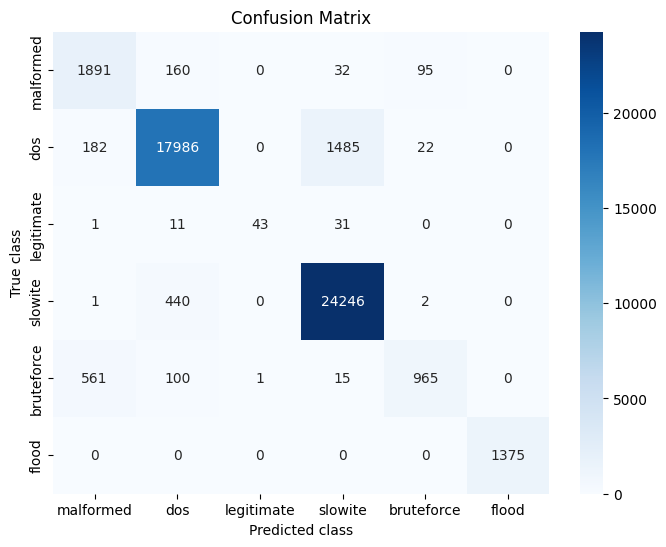

In [34]:
class_names = df1['target'].unique()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)

plt.title('Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
